In [ ]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer


# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery


# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization


# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
log = xes_importer.apply("C:\\Users\\20204502\\Downloads\\BPI_Challenge_2012.xes.gz")


In [ ]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter


log_start = start_activities_filter.get_start_activities(log)
end_activities = end_activities_filter.get_end_activities(log)
log_start  # Printing the start activity in our log

In [ ]:
end_activities  # Printing the end activity in our log


In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
variants = variants_filter.get_variants(log)
  
print(f"We have {len(variants)} variants in our log")

In [ ]:
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
## Printing the top 10 variants by case number
variants_count[:10] 


In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
activities


In [ ]:
import os 
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\\Graphviz\\bin" # First install graphviz via the website, then run this code

In [ ]:
net, initial_marking, final_marking = alpha_miner.apply(log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)



## Adding frequency will make it more informative.

parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)

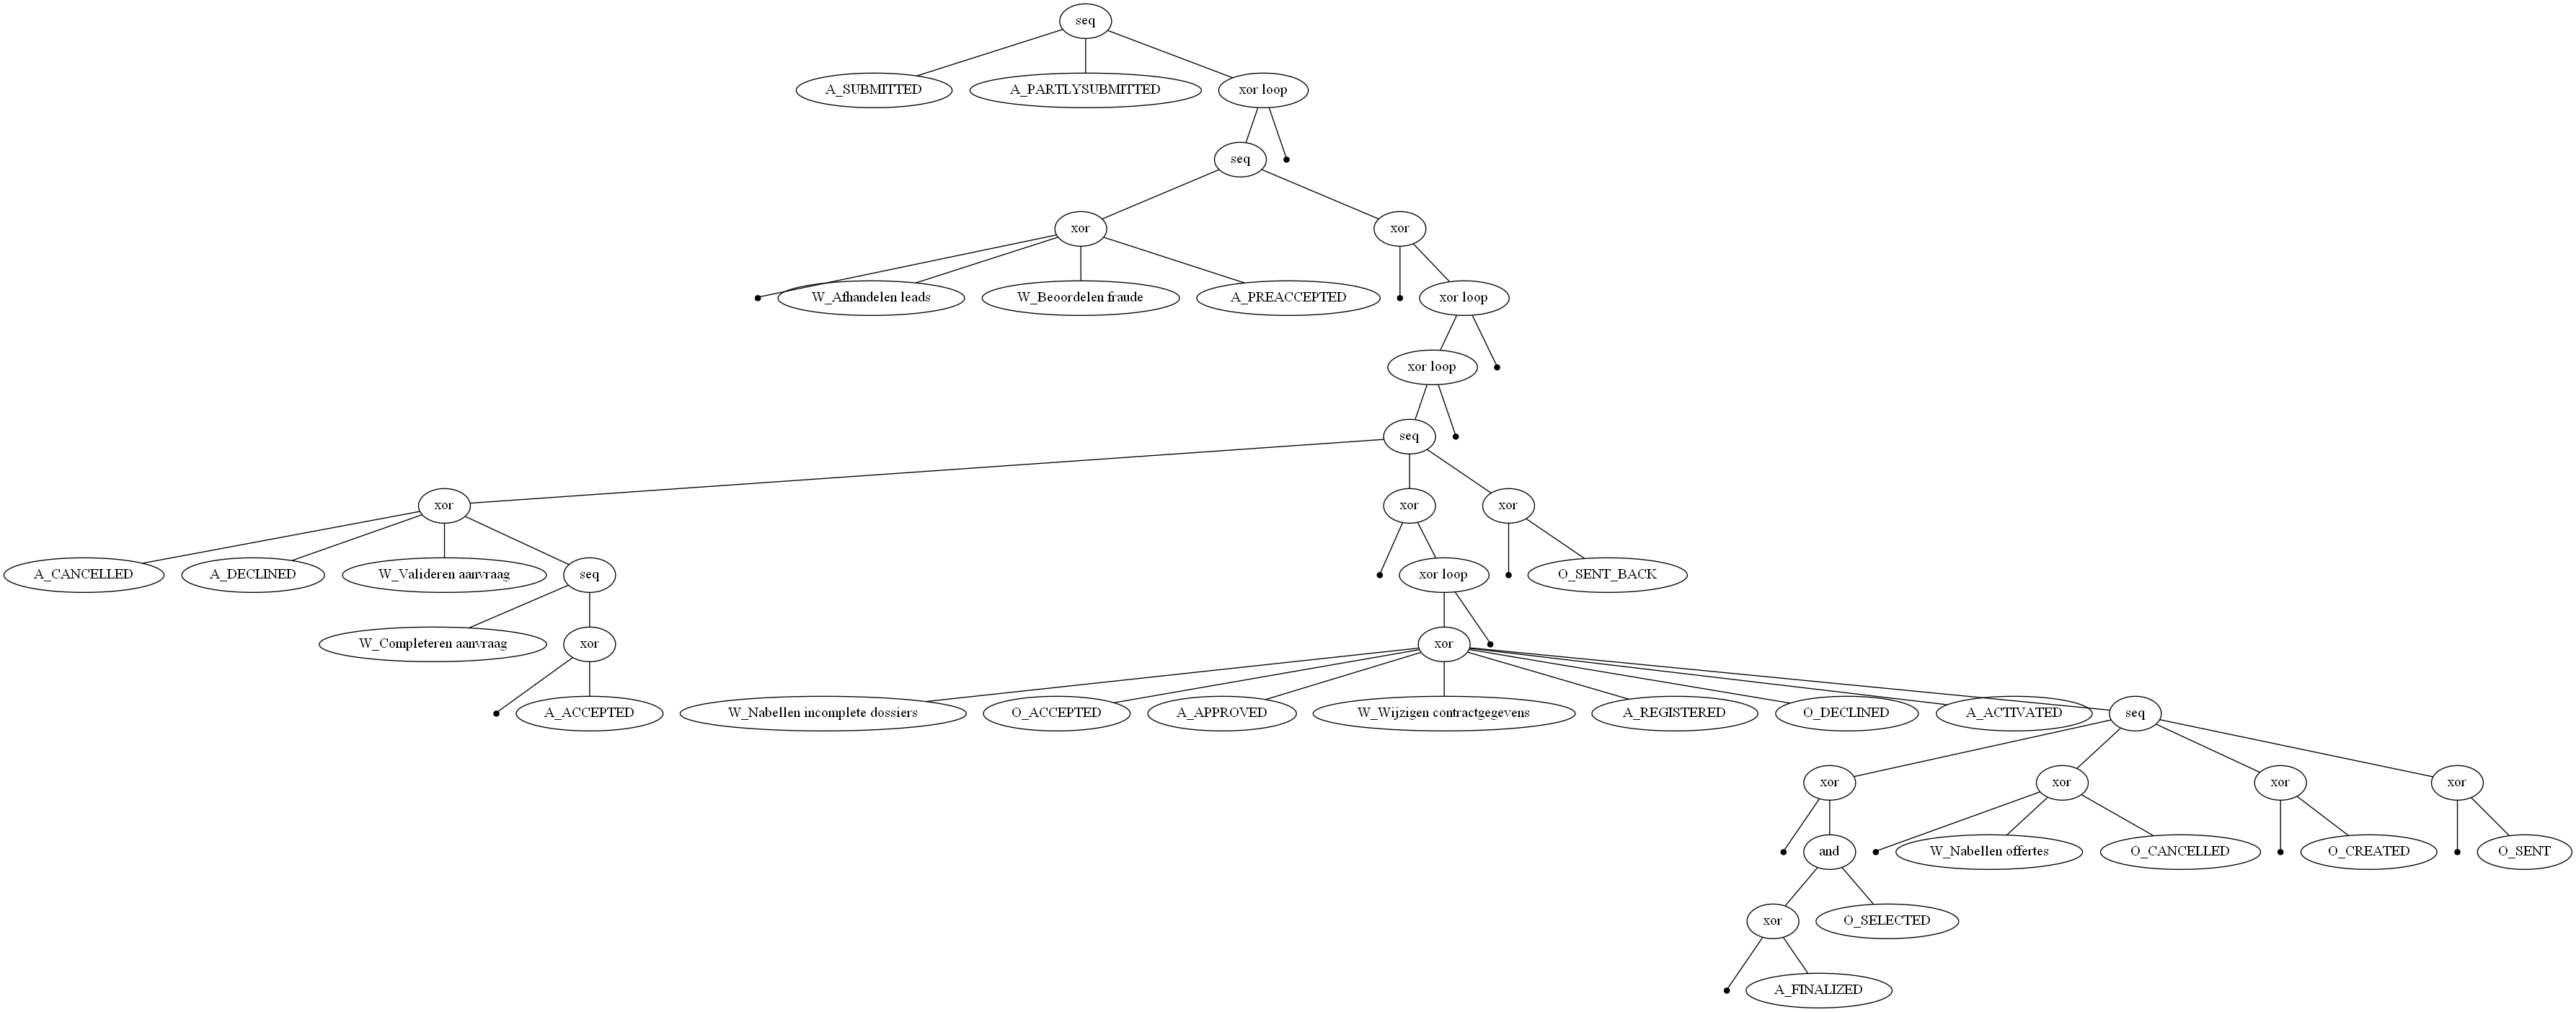

In [15]:
tree = inductive_miner.apply_tree(log)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

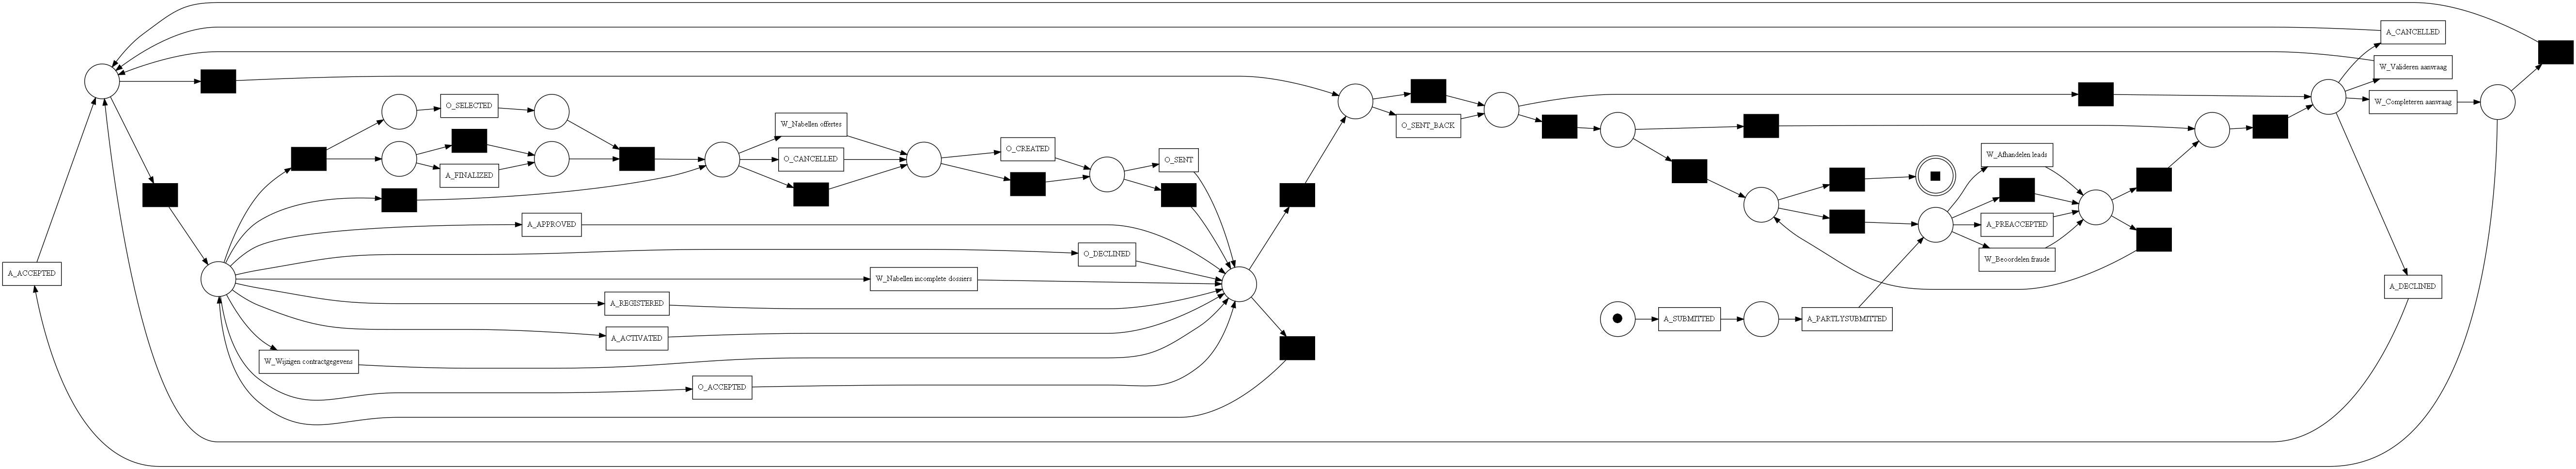

In [16]:
net, initial_marking, final_marking = pt_converter.apply(tree, 
variant=pt_converter.Variants.TO_PETRI_NET)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

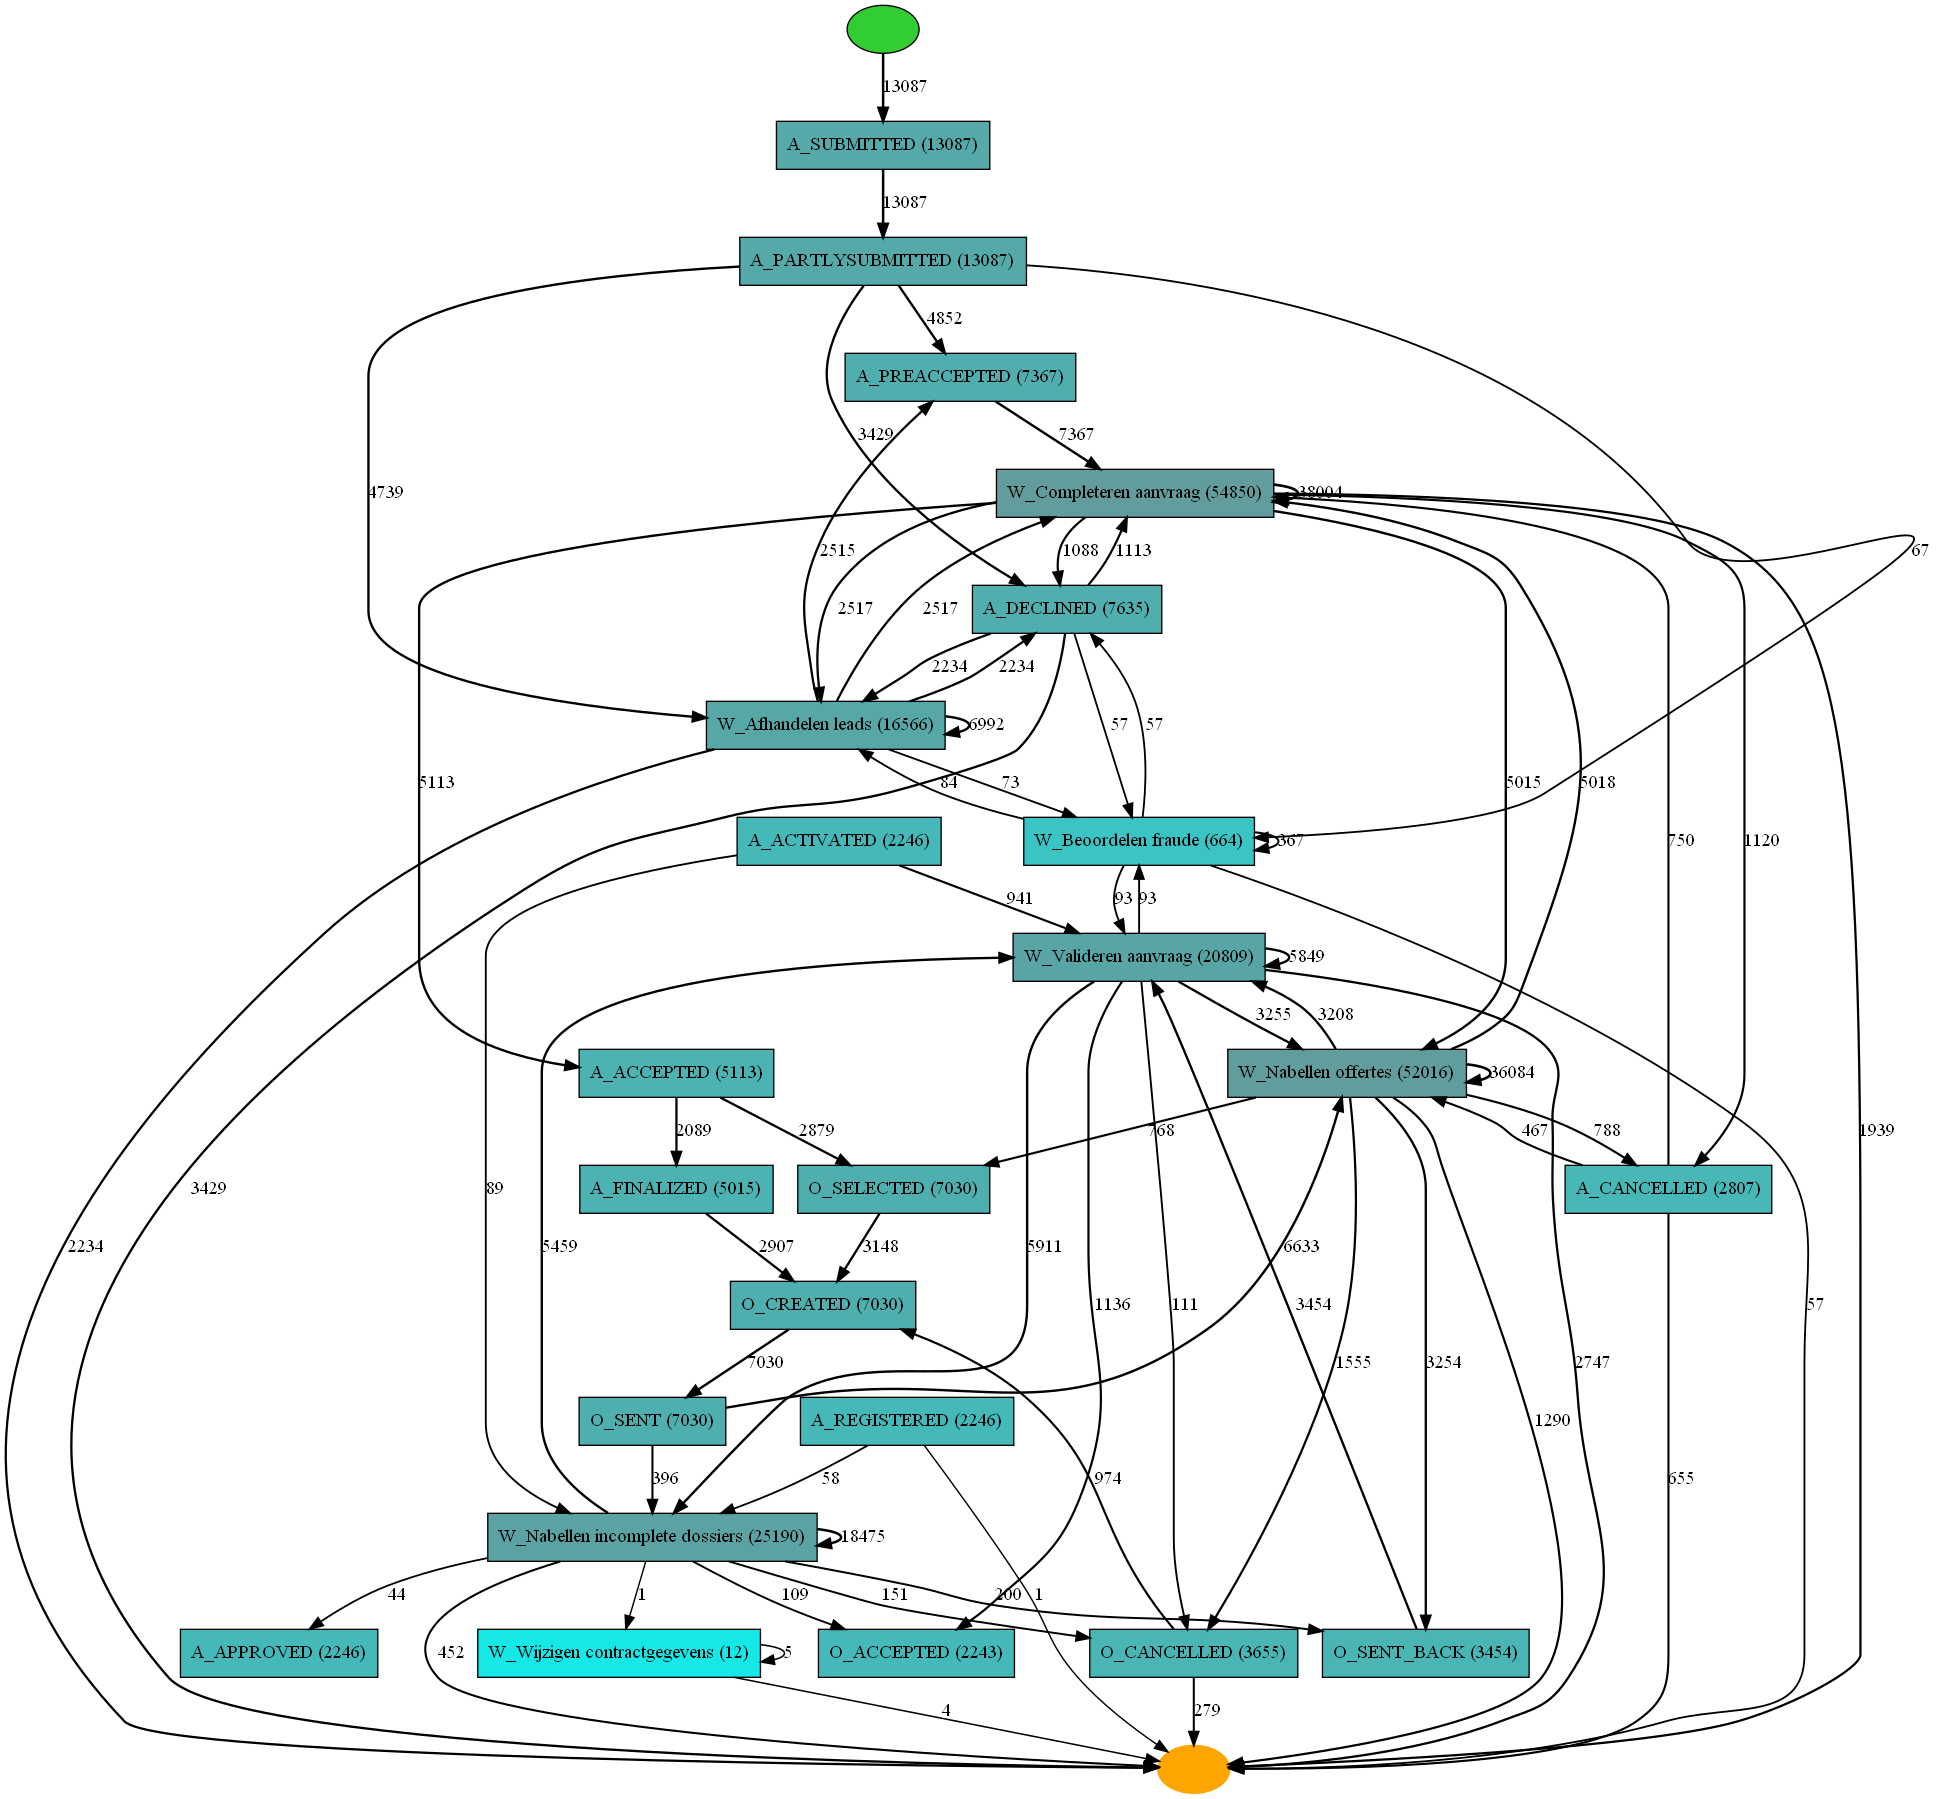

In [17]:
heu_net = heuristics_miner.apply_heu(log, 
parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5})

gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

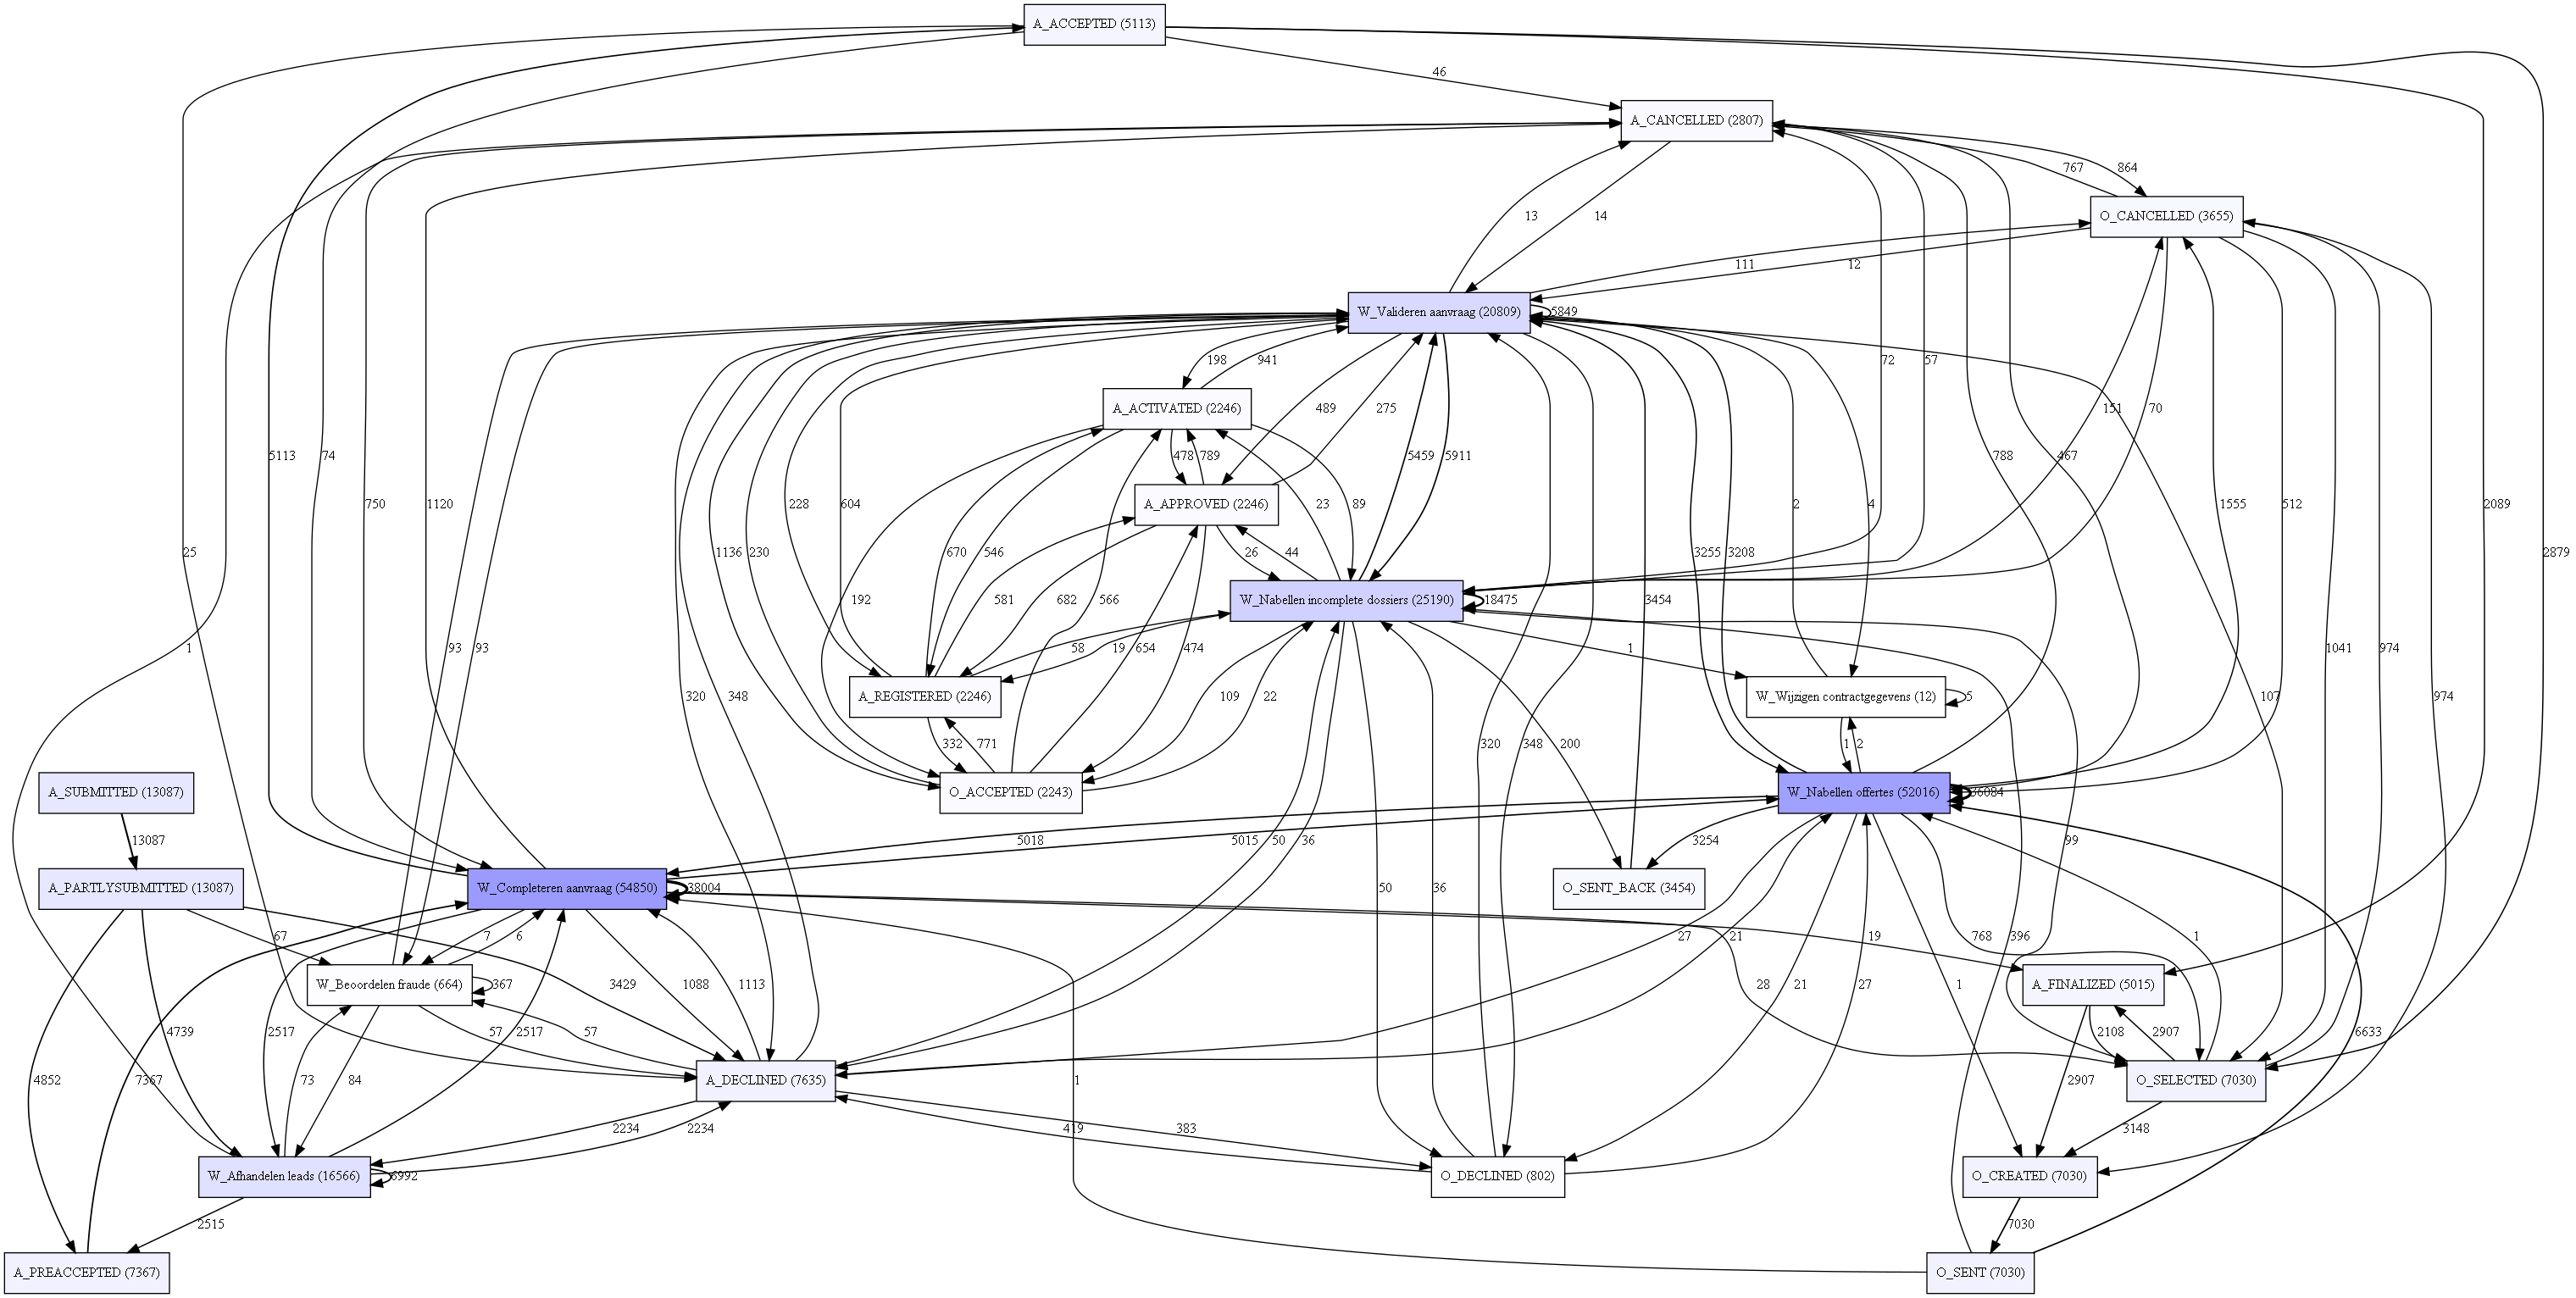

In [21]:
dfg = dfg_discovery.apply(log)


from pm4py.visualization.dfg import visualizer as dfg_visualization

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)